In [89]:
!pip install pandas matplotlib seaborn selenium


In [90]:
!apt-get update
!apt install chromium-chromedriver -y
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,722 kB]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,927 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [3,211 kB]
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:13 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 15.1 MB 

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import selenium
import csv

In [69]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
import time

In [92]:
query = input("Enter the search keyword: ")

Enter the search keyword: running shoes


In [93]:
options = Options()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

driver = webdriver.Chrome(options=options)
driver.get("https://www.amazon.in")

time.sleep(2)

search_box = driver.find_element(By.ID, "twotabsearchtextbox")
search_box.send_keys(query)
search_button = driver.find_element(By.ID, "nav-search-submit-button")
search_button.click()

time.sleep(3)

products = driver.find_elements(By.XPATH, "//div[@data-component-type='s-search-result']")

with open("amazon_data.csv", "w", newline="", encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerow(["Title", "Brand", "Rating", "Reviews", "Price", "Image URL", "Product URL"])

    for product in products:

        try:

            sponsored = product.find_element(By.XPATH, ".//span[normalize-space(text())='Sponsored']")
            is_sponsored = True
        except:
            is_sponsored = False

        # Only scrapes sponsored products
        if is_sponsored:
            try:
                title = product.find_element(By.TAG_NAME, "h2").text
                product_url = product.find_element(By.TAG_NAME, "a").get_attribute("href")
            except:
                title = product_url = ""

            try:
                brand = product.find_element(By.XPATH, ".//h5").text
            except:
                brand = title.split()[0]

            try:
                rating_text = product.find_element(By.XPATH, ".//span[@class='a-icon-alt']").get_attribute("innerHTML")
                rating = rating_text.split()[0]
            except:
                rating = ""

            try:
                reviews = product.find_element(By.XPATH, ".//span[@class='a-size-base s-underline-text']").text
            except:
                reviews = ""

            try:
                price = product.find_element(By.CSS_SELECTOR, "span.a-price-whole").text
            except:
                price = ""

            try:
                img_url = product.find_element(By.TAG_NAME, "img").get_attribute("src")
            except:
                img_url = ""

            writer.writerow([title, brand, rating, reviews, price, img_url, product_url])

driver.quit()


In [94]:
df = pd.read_csv('/content/amazon_data.csv', on_bad_lines='skip')



In [95]:
import pandas as pd

df = pd.read_csv("amazon_data.csv")

df = df.drop_duplicates()

df['Price'] = df['Price'].replace({'₹': '', ',': ''}, regex=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')


df['Reviews'] = df['Reviews'].replace({',': ''}, regex=True)
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

missing_values = df.isnull().sum()
df['Price'] = df['Price'].fillna(df['Price'].median())
df['Reviews'] = df['Reviews'].fillna(df['Reviews'].median())
df['Rating'] = df['Rating'].fillna(df['Rating'].median())
df['Title'] = df['Title'].astype(str)
df.to_csv("cleaned_amazon_data.csv", index=False)

print(df.head())


     Title    Brand  Rating  Reviews  Price  \
0  Boldfit  Boldfit     3.8    218.0   1299   
1   BRUTON   BRUTON     3.4    272.0    498   
2   BRUTON   BRUTON     3.0   1540.0    278   
3   BRUTON   BRUTON     3.1    707.0    399   
4    ASIAN    ASIAN     4.1    200.0    799   

                                           Image URL  \
0  https://m.media-amazon.com/images/I/61n0c-nFbB...   
1  https://m.media-amazon.com/images/I/71f3BmjCwt...   
2  https://m.media-amazon.com/images/I/61gKatv2y7...   
3  https://m.media-amazon.com/images/I/81imDhMFJD...   
4  https://m.media-amazon.com/images/I/7192PL6reT...   

                                         Product URL  
0  https://www.amazon.in/sspa/click?ie=UTF8&spc=M...  
1  https://www.amazon.in/sspa/click?ie=UTF8&spc=M...  
2  https://www.amazon.in/sspa/click?ie=UTF8&spc=M...  
3  https://www.amazon.in/sspa/click?ie=UTF8&spc=M...  
4  https://www.amazon.in/sspa/click?ie=UTF8&spc=M...  


In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("cleaned_amazon_data.csv")


In [97]:
brand_counts = df['Brand'].value_counts()

top_5_brands = brand_counts.head(5)


In [98]:
brand_avg_rating = df.groupby('Brand')['Rating'].mean().sort_values(ascending=False)

brand_analysis = pd.DataFrame({
    'Frequency': brand_counts,
    'Average Rating': brand_avg_rating
}).dropna()


In [99]:
print("Top 5 Most Frequent Brands:\n", top_5_brands)
print("\nTop High-Rated Brands (Rating > 4.5 and Frequency < 5):\n",
      brand_analysis[(brand_analysis['Average Rating'] > 4.5) & (brand_analysis['Frequency'] < 5)])


Top 5 Most Frequent Brands:
 Brand
BRUTON     3
Boldfit    1
ASIAN      1
Bear       1
Cleno      1
Name: count, dtype: int64

Top High-Rated Brands (Rating > 4.5 and Frequency < 5):
        Frequency  Average Rating
Brand                           
Bear           1             5.0


<ipython-input-100-70f9dc94214f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_brands.index, y=top_5_brands.values, palette="Blues_d")


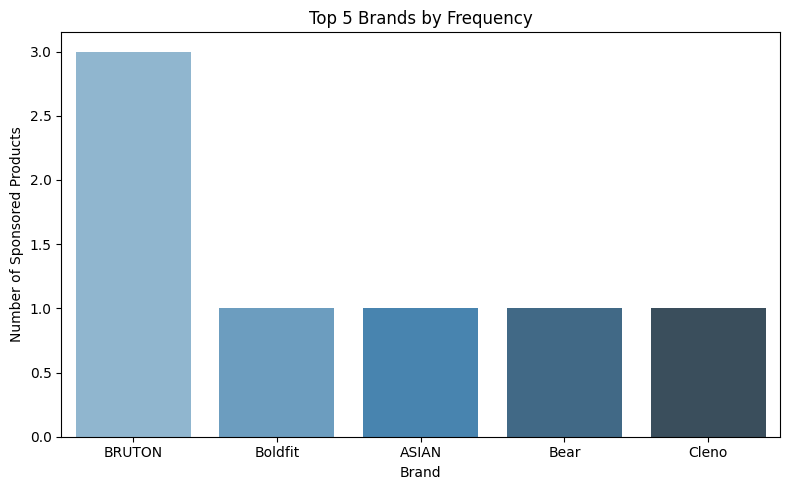

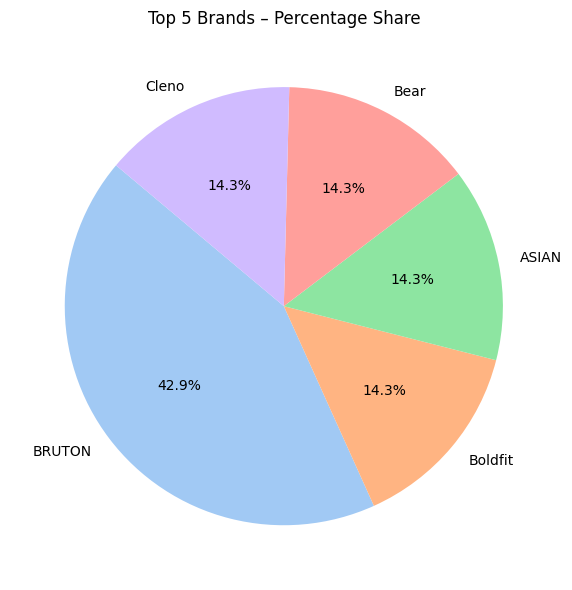

In [100]:
plt.figure(figsize=(8, 5))
sns.barplot(x=top_5_brands.index, y=top_5_brands.values, palette="Blues_d")
plt.title("Top 5 Brands by Frequency")
plt.xlabel("Brand")
plt.ylabel("Number of Sponsored Products")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
top_5_brands.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Top 5 Brands – Percentage Share")
plt.ylabel("")
plt.tight_layout()
plt.show()


In [101]:
df = df[(df['Price'] > 0) & (df['Rating'] > 0)]


In [102]:
bins = [0, 3, 3.5, 4, 4.5, 5]
labels = ['<3', '3-3.5', '3.5-4', '4-4.5', '4.5-5']
df['RatingRange'] = pd.cut(df['Rating'], bins=bins, labels=labels)


In [103]:
avg_price_by_rating = df.groupby('RatingRange')['Price'].mean()


<ipython-input-103-bc67174c674a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_rating = df.groupby('RatingRange')['Price'].mean()


In [104]:
high_value = df[(df['Rating'] >= 4.5) & (df['Price'] < 300)]

overpriced = df[(df['Rating'] <= 3.5) & (df['Price'] > 500)]

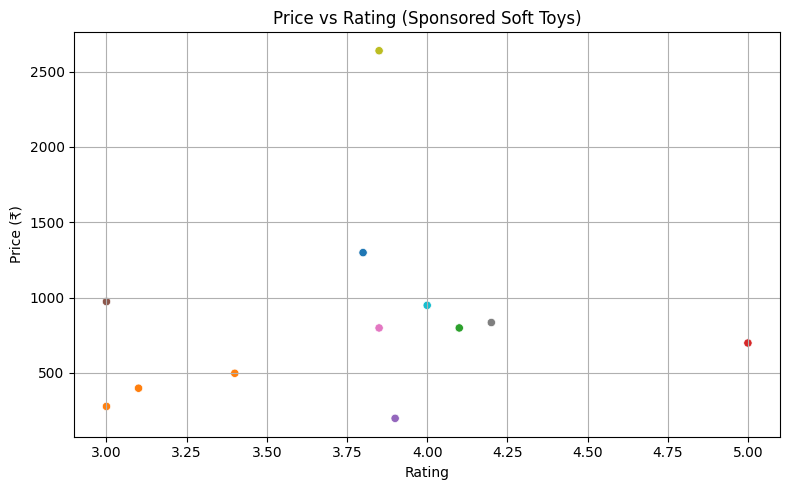

In [105]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Rating', y='Price', hue='Brand', legend=False)
plt.title("Price vs Rating (Sponsored Soft Toys)")
plt.xlabel("Rating")
plt.ylabel("Price (₹)")
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-106-df482f9dc067>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_by_rating.index, y=avg_price_by_rating.values, palette="coolwarm")


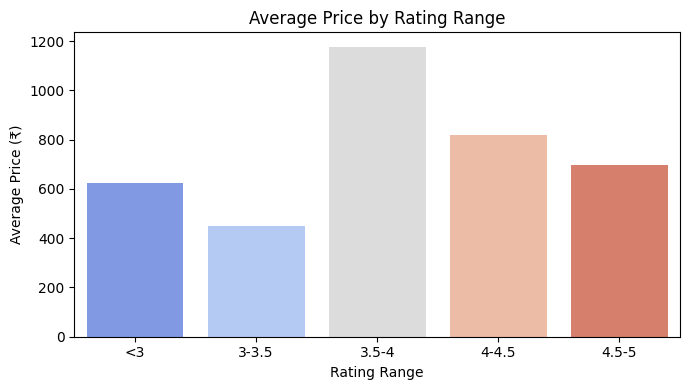

In [106]:
plt.figure(figsize=(7, 4))
sns.barplot(x=avg_price_by_rating.index, y=avg_price_by_rating.values, palette="coolwarm")
plt.title("Average Price by Rating Range")
plt.xlabel("Rating Range")
plt.ylabel("Average Price (₹)")
plt.tight_layout()
plt.show()


In [107]:
df = df[(df['Rating'] > 0) & (df['Reviews'] > 0)]


In [108]:
top_reviewed = df.sort_values(by='Reviews', ascending=False).head(5)
top_rated = df.sort_values(by='Rating', ascending=False).head(5)


<ipython-input-109-e8b945f45018>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_reviewed, x='Title', y='Reviews', palette='viridis')


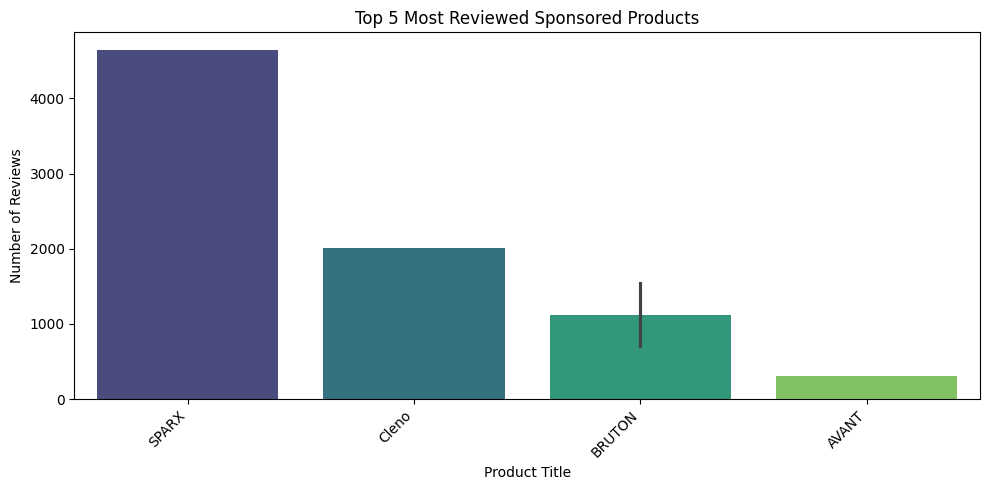

In [109]:
plt.figure(figsize=(10, 5))
sns.barplot(data=top_reviewed, x='Title', y='Reviews', palette='viridis')
plt.title("Top 5 Most Reviewed Sponsored Products")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Number of Reviews")
plt.xlabel("Product Title")
plt.tight_layout()
plt.show()


<ipython-input-110-77c11b0f4605>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_rated, x='Title', y='Rating', palette='magma')


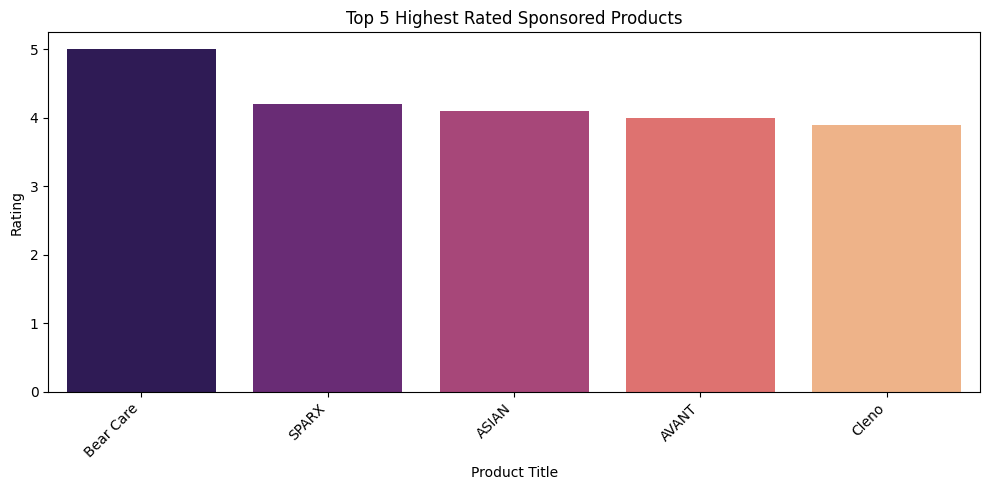

In [110]:
plt.figure(figsize=(10, 5))
sns.barplot(data=top_rated, x='Title', y='Rating', palette='magma')
plt.title("Top 5 Highest Rated Sponsored Products")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Rating")
plt.xlabel("Product Title")
plt.tight_layout()
plt.show()
